<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Fit-the-wind-profiles-to-a-modified-log(z)-function" data-toc-modified-id="Fit-the-wind-profiles-to-a-modified-log(z)-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fit the wind profiles to a modified log(z) function</a></span><ul class="toc-item"><li><span><a href="#2am-UTC" data-toc-modified-id="2am-UTC-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>2am UTC</a></span></li><li><span><a href="#Buoyancy-flux-and-L" data-toc-modified-id="Buoyancy-flux-and-L-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Buoyancy flux and L</a></span></li></ul></li><li><span><a href="#check-the-u-profile-at-20-and-80-meters" data-toc-modified-id="check-the-u-profile-at-20-and-80-meters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>check the u profile at 20 and 80 meters</a></span></li></ul></div>

In [2]:
import glob
from netCDF4 import Dataset
from dateutil.parser import parse
import datetime
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pytz
from datetime import datetime as dt

# read in the july 2014 profiles

In [4]:
the_file='cabauw_ubc.nc'
group='m201407'
with Dataset(the_file,'r') as nc_ubc:
    jul_nc=nc_ubc.groups[group]
    z=nc_ubc.variables['z'][...]
    jul_speed=jul_nc.variables['F'][...]
    jul_ta002 = jul_nc.variables['TA002']

jul_speed.shape

(31, 24, 6, 7)

# calculate hourly averages

In [6]:
hourly_wind_avg=jul_speed.mean(axis=2)

In [5]:
hourly_wind_avg.shape

(31, 24, 7)

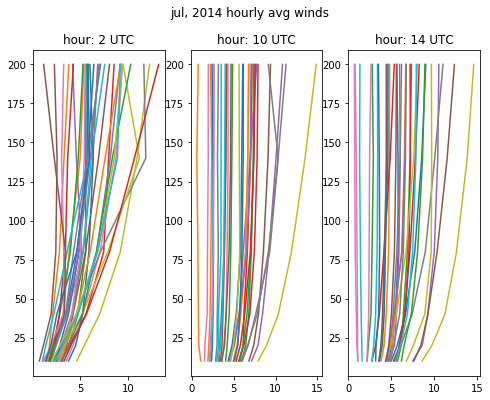

In [9]:
the_month='jul, 2014'
hour=2
fig,ax=plt.subplots(1,3,figsize=(8,6))
ax[0].plot(hourly_wind_avg[:,hour,:].T,z)
ax[0].set(title='hour: {} UTC'.format(hour))
hour=10
ax[1].plot(hourly_wind_avg[:,hour,:].T,z)
ax[1].set(title='hour: {} UTC'.format(hour))
fig.suptitle('{} hourly avg winds'.format(the_month))
hour=14
ax[2].plot(hourly_wind_avg[:,hour,:].T,z)
ax[2].set(title='hour: {} UTC'.format(hour))
fig.suptitle('{} hourly avg winds'.format(the_month));

# Fit the wind profiles to a modified log(z) function

Follow [Verkaik and Holtslag, 2007](http://ezproxy.library.ubc.ca/login?url=http://link.springer.com/10.1007/s10546-006-9121-1) and fit the windspeed to a modified log profile using scipy.optimize.curve_fit

```
S=a0 + a1*z + a2*z**2 + a3*np.log(z)
direc=b0 + b1*z + b2*z**2
theta=c0 + c1*z + c2*z**2. + c3*np.log(z)
```

In [13]:
def wind_func(z, *coeffs):
    'nonlinear function in a and to fit to data'
    fit = coeffs[0] + coeffs[1]*z + coeffs[2]*z**2. + coeffs[3]*np.log(z)
    return fit

In [11]:
import numpy as np
from scipy.optimize import curve_fit
import scipy
from scipy.stats.distributions import  t
import warnings
warnings.filterwarnings("ignore",category=scipy.optimize.OptimizeWarning)

## 2am UTC

/Users/phil/mini36/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


fit coefficients [  1.34085156e+00   5.69129325e-02  -9.56274378e-05  -3.37578264e-01]


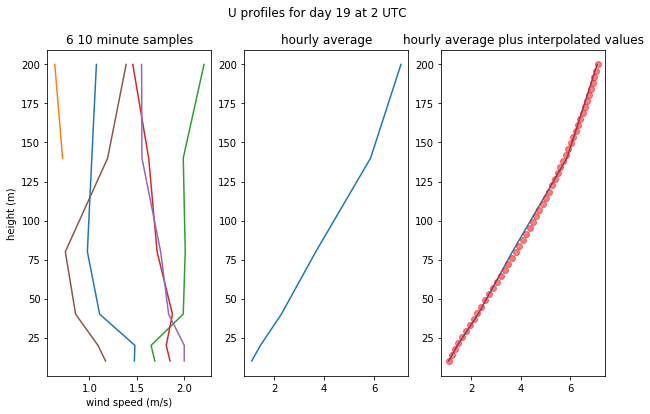

In [17]:
# 2 UTC
hour1=2 # early morning
day=19 
fig,ax=plt.subplots(1,3,figsize=(10,6))
sample1=jul_speed[day,hour,:,:]
fig.suptitle('U profiles for day {} at {} UTC'.format(day,hour1))
ax[0].plot(sample1.T,z)
ax[0].set(title='6 10 minute samples',xlabel='wind speed (m/s)',
         ylabel='height (m)')
ax[1].plot(hourly_wind_avg[day,hour1,:],z)
ax[1].set(title='hourly average')
ax[2].plot(hourly_wind_avg[day,hour1,:],z)
ax[2].set(title='hourly average plus interpolated values')
#
# flip tower data so it goes from bottom to top
# and get rid of the lowest level, which doesn't
# have a measurement
#
rev_z=z[::-1]
rev_z=rev_z[1:]
test=hourly_wind_avg[day,hour1,::-1]
#
# lose the bottom value
#
test=test[1:]



initial_guess=[0,0,0,0]
pars, pcov = curve_fit(wind_func, rev_z, test, p0=initial_guess)
zinterp=np.linspace(10.,200,50.)
speed_interp=wind_func(zinterp,*pars)
ax[2].plot(speed_interp,zinterp,'ro',alpha=0.5)
print(f'fit coefficients {pars}')

/Users/phil/mini36/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


fit coefficients [  1.41688830e+00  -6.75811001e-03   1.81100325e-05   3.56676286e-01]


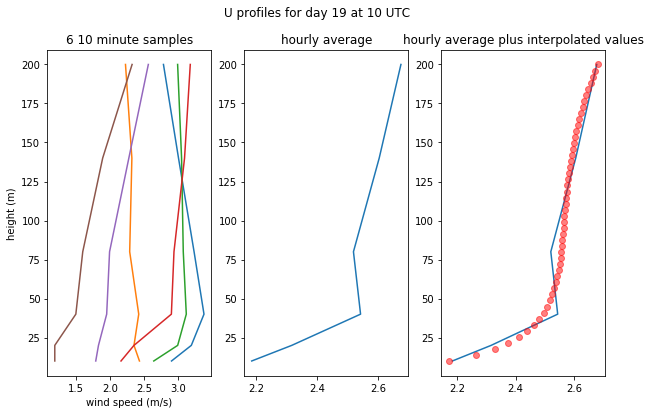

In [18]:
# 10 UTC
hour2=10 # later morning
fig,ax=plt.subplots(1,3,figsize=(10,6))
fig.suptitle('U profiles for day {} at {} UTC'.format(day,hour2))
sample2=jul_speed[day,hour2,:,:]
ax[0].plot(sample2.T,z)
ax[0].set(title='6 10 minute samples',xlabel='wind speed (m/s)',
         ylabel='height (m)')
ax[1].plot(hourly_wind_avg[day,hour2,:],z)
ax[1].set(title='hourly average')
ax[2].plot(hourly_wind_avg[day,hour2,:],z)
ax[2].set(title='hourly average plus interpolated values')
#
# flip tower data so it goes from bottom to top
# and get rid of the lowest level, which doesn't
# have a measurement
#
rev_z=z[::-1]
rev_z=rev_z[1:]
test=hourly_wind_avg[day,hour2,::-1]
test=test[1:]

initial_guess=[0,0,0,0]
pars, pcov = curve_fit(wind_func, rev_z, test, p0=initial_guess)
initial_guess
pars
zinterp=np.linspace(10.,200,50.)
speed_interp=wind_func(zinterp,*pars)
ax[2].plot(speed_interp,zinterp,'ro',alpha=0.5)
print(f'fit coefficients {pars}')

/Users/phil/mini36/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


fit coefficients [  1.64736696e+00  -4.72017892e-03   1.50028515e-05   1.51427570e-02]


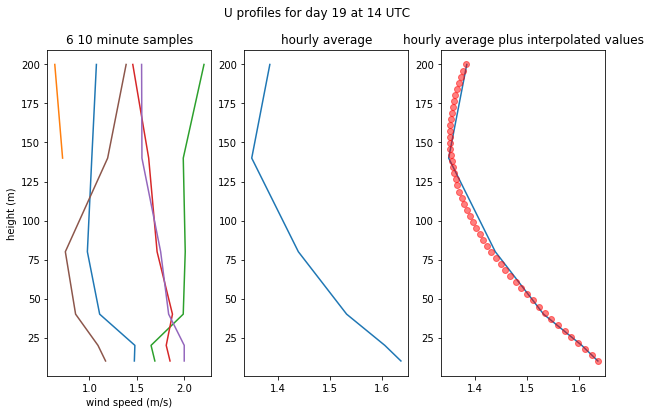

In [19]:
# 14 UTC
hour3=14 # afternoon
fig,ax=plt.subplots(1,3,figsize=(10,6))
fig.suptitle('U profiles for day {} at {} UTC'.format(day,hour3))
sample3=jul_speed[day,hour3,:,:]
ax[0].plot(sample3.T,z)
ax[0].set(title='6 10 minute samples',xlabel='wind speed (m/s)',
         ylabel='height (m)')
ax[1].plot(hourly_wind_avg[day,hour3,:],z)
ax[1].set(title='hourly average')
ax[2].plot(hourly_wind_avg[day,hour3,:],z)
ax[2].set(title='hourly average plus interpolated values')
#
# flip tower data so it goes from bottom to top
# and get rid of the lowest level, which doesn't
# have a measurement
#
rev_z=z[::-1]
rev_z=rev_z[1:]

test=hourly_wind_avg[day,hour3,::-1]
test=test[1:]

initial_guess=[0,0,0,0]
pars, pcov = curve_fit(wind_func, rev_z, test, p0=initial_guess)
initial_guess
pars
zinterp=np.linspace(10.,200,50.)
speed_interp=wind_func(zinterp,*pars)
ax[2].plot(speed_interp,zinterp,'ro',alpha=0.5)
print(f'fit coefficients {pars}')

# calculate L

In [20]:
with Dataset(the_file,'r') as nc_ubc:
    jul_nc=nc_ubc.groups[group]
    H=jul_nc.variables['H'][...]
    LE = jul_nc.variables['LE'][...]
    USTAR = jul_nc.variables['UST'][...]
    TA002 = jul_nc.variables['TA002'][...]
    Q002 = jul_nc.variables['Q002'][...]
    P0 = jul_nc.variables['P0'][...]
    timevec = jul_nc.variables['time'][...]
    timevec = [dt.fromtimestamp(item,pytz.utc) \
               for item in timevec.flat]
    
Rd=287.  #J/kg/K
cp = 1004.  #J/kg/K
k = 0.4
g=9.8
rho = P0*1.e2/(Rd*(TA002 + 273.15))



## Buoyancy flux and L

In [21]:
#fleagle and bussinger eq. 6.31
Eb = H + 0.02*LE
#virtural temperature 
Tv = TA002 + 273.15  + 0.61*Q002*1.e-3
#Fleagle and Businger 6.47
L = - Tv*cp*rho*USTAR**3./(k*g*Eb)
good = np.abs(Eb) > 1

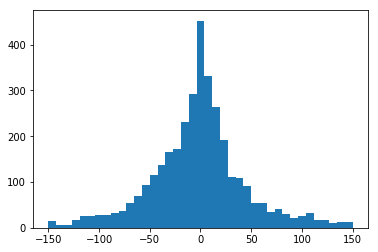

In [13]:
fig,ax=plt.subplots(1,1)
out=plt.hist(L[good].flat,bins=np.linspace(-150,150,40))

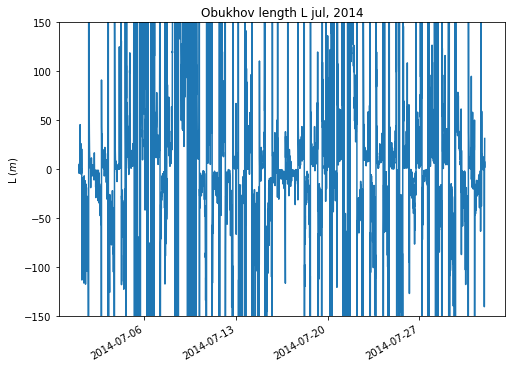

In [14]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
fig.autofmt_xdate()
ax.plot(timevec,L.flat)
title='Obukhov length L {}'.format(the_month)
out=ax.set(title=title,ylabel='L $(m)$',ylim=[-150,150])

# check the u profile at 20 and 80 meters

In [15]:
# get indexes for z = 20 m and z = 80 m
level_80 = np.where(z == 80)[0][0]
level_20 = np.where(z == 20)[0][0]

# helper functions for calculating phis
def find_gradient(hourly_wind_avg, z, day, hour, level):
    "Function to quickly calculate dUdz for a certain hour and level"
    "Uses 'forward euler' to numerically calculate gradient"
    
    return (hourly_wind_avg[day,hour,level] - hourly_wind_avg[day,hour,level+1])/(z[level] - z[level+1])

def find_scaling(hourly_wind_avg, z, L, ustars, day, hour, level):
    """Calculate phi and zeta at a given level and time"""
    
    k = 0.40
    height = z[level]
    ustar = ustars[day, hour, level]
    dUdz = find_gradient(hourly_wind_avg, z, day, hour, level)
    phi = (k*height/ustar)*dUdz
    zeta = z[level]/L[day, hour, level]
    return phi,zeta

def dyer(zeta):
    'calculate curve from Dyer equations (Surface layer similarity 18 + 19)'
    #gradient_fit = (zeta**(1))*(coeffs[0] + 2*coeffs[1]*zeta + coeffs[2]*1/zeta) # derivative, dU/dz as estimated from Nieuwstadt (1984)
    gamma_1 =16
    beta = 5
    if zeta < 0:
        # unstable
        phi_dyer = (1 - gamma_1*zeta)**(-1/4)
    else:
        phi_dyer = 1 + beta*zeta
    return phi_dyer

def fit_dyer(zetas, *coeffs):
    'calculate curve from Dyer equations (Surface layer similarity 18 + 19)'
    #gradient_fit = (zeta**(1))*(coeffs[0] + 2*coeffs[1]*zeta + coeffs[2]*1/zeta) # derivative, dU/dz as estimated from Nieuwstadt (1984)
    phi_dyers = []
    for zeta in zetas:
        if zeta < 0:
            # unstable
            phi_dyer = (1 - coeffs[0]*zeta)**(-1/4)
        else:
            phi_dyer = 1 + coeffs[1]*zeta
        phi_dyers.append(phi_dyer)
    return phi_dyers


/Users/phil/mini36/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/phil/mini36/lib/python3.6/site-packages/ipykernel_launcher.py:52: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


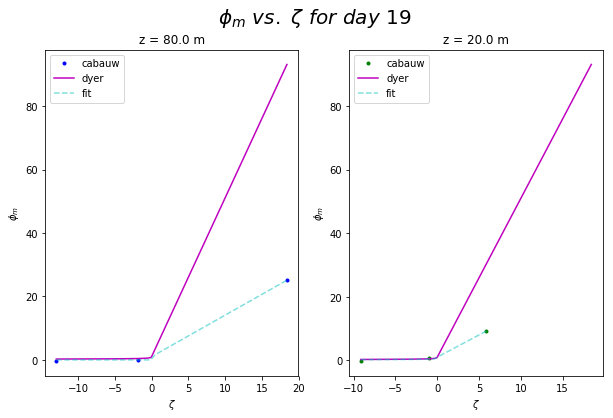

In [16]:
# calculate and plot cabauw data with the Dyer equations + fit
hours = [hour1,hour2,hour3]
levels = [level_80, level_20]

phi_len = len(hours)*len(levels)
phis = np.empty([phi_len])
zetas = np.empty([phi_len])

phis80 = []
zetas80 = []
phis20 = []
zetas20 = []

# calculate phi from data
for hour in hours:
    for level in levels:
        phi,zeta = find_scaling(hourly_wind_avg, z, L, USTAR, day, hour, level)
        if level==levels[0]:
            phis80.append(phi)
            zetas80.append(zeta)
        else:
            phis20.append(phi)
            zetas20.append(zeta)

fig,ax=plt.subplots(1,2,figsize=(10,6))
fig.suptitle(r"$\phi_m\ vs.\ \zeta\ for\ day\ {}$".format(day,hour3),fontsize=20)
ax[0].plot(zetas80, phis80, '.b',label='cabauw')
ax[1].plot(zetas20, phis20, '.g',label='cabauw')
ax[0].set(xlabel=r'$\zeta$',ylabel=r'$\phi_m$',title='z = {} m'.format(z[levels[0]]))
ax[1].set(xlabel=r'$\zeta$',ylabel=r'$\phi_m$',title='z = {} m'.format(z[levels[1]]))

# calculate Dyer values for phi
dyer_zetas80 = np.arange(min(zetas80),max(zetas80),0.001)
dyer_zetas20 = np.arange(min(zetas20),max(zetas80),0.001)

phis_dyer80 = [dyer(dyer_zeta80) for dyer_zeta80 in dyer_zetas80]   
phis_dyer20 = [dyer(dyer_zeta20) for dyer_zeta20 in dyer_zetas20] 

ax[0].plot(dyer_zetas80, phis_dyer80 , '-m',label='dyer')
ax[1].plot(dyer_zetas20, phis_dyer20, '-m',label='dyer')

# fit curve for z = 80 m
initial_guess=[0,0]
pars80, pcov80 = curve_fit(fit_dyer, zetas80, phis80, p0=initial_guess)
zetainterp=np.linspace(min(zetas80),max(zetas80),50.)
grad_interp=fit_dyer(zetainterp,*pars80)
fit80=ax[0].plot(zetainterp,grad_interp,'c--',alpha=0.5,label='fit')

# fit curve for z = 20 m
initial_guess=[0,0]
pars20, pcov20 = curve_fit(fit_dyer, zetas20, phis20, p0=initial_guess)
zetainterp=np.linspace(min(zetas20),max(zetas20),50.)
grad_interp=fit_dyer(zetainterp,*pars20)
fit20=ax[1].plot(zetainterp,grad_interp,'c--',alpha=0.5,label='fit')

ax[0].legend(loc='best')
ax[1].legend(loc='best')
